# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [59]:
import pickle

In [60]:
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('product_reviews.csv')
data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,Went in for a lunch. Steak sandwich was delici...,5.0,1
2,This place has gone down hill. Clearly they h...,1.0,0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0,0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0,1


In [62]:
data.shape

(26661, 3)

In [63]:
train_data = data.iloc[train_test_index_dict['train_index']]
test_data = data.iloc[train_test_index_dict['test_index']]

In [64]:
print(train_data.shape,test_data.shape)

(17862, 3) (8799, 3)


In [65]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [66]:
sn = SnowballStemmer("english")
stop = set(stopwords.words('english'))

In [67]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub('[^a-z0-9]',' ',sms)
  sms = nltk.word_tokenize(sms)
  sms = [t for t in sms if len(t)>1]
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = ' '.join(sms)
  return sms

In [68]:
train_data['clean_text'] = train_data['text'].apply(clean_text)

<ipython-input-68-934f47b6622e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['clean_text'] = train_data['text'].apply(clean_text)


In [69]:
test_data['clean_text'] = test_data['text'].apply(clean_text)

<ipython-input-69-48056aa4fe78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['clean_text'] = test_data['text'].apply(clean_text)


In [70]:
train_data.head()

,text,stars,sentiment,clean_text
6914,I have been here twice. Both times the staff ...,5.0,1,twice time staff super friend help pina colada...
8332,Awesome for getting your CPR card! They were r...,5.0,1,awesom get cpr card realli nice definit taught...
2791,Came here on a date night with my girlfriend ...,4.0,1,came date night girlfriend sunday busi seat im...
25106,Fulton Homes continually produces high quality...,5.0,1,fulton home continu produc high qualiti home u...
11135,"J'aime ce petit café, car nous n'avons jamais ...",4.0,1,aim ce petit caf car nous avon jamai impress t...


In [71]:
train_data['sentiment'].unique()

array([1, 0])

In [72]:
test_data.head()

,text,stars,sentiment,clean_text
9576,Awesome place for brekky and great service. On...,4.0,1,awesom place brekki great servic downsid wait ...
7281,The location is very convenient very close to ...,2.0,0,locat conveni close freeway access normal offe...
22608,It took me 20+ years to find Vicky and I'm nev...,5.0,1,took 20 year find vicki never leav nail skin n...
4134,Came the same day! Honest and you can tell he...,5.0,1,came day honest tell love would give ten star ...
18759,"Bad service, Bland Pizza, and really really ov...",2.0,0,bad servic bland pizza realli realli overpr wh...


In [73]:
test_data['sentiment'].unique()

array([1, 0])

In [74]:
from wordcloud import WordCloud

In [75]:
data_5_star = train_data[train_data['stars']==5.0]
data_5_star = data_5_star['clean_text']

In [76]:
def wordCloud(data):
  words = ' '.join(data)
  wc = WordCloud()
  wc = wc.generate(words)

  plt.imshow(wc)

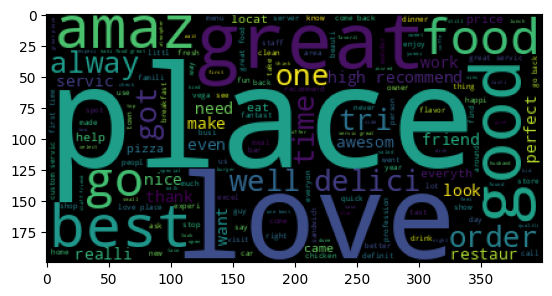

In [77]:
wordCloud(data_5_star)

In [78]:
data_4_star = train_data[train_data['stars']==4.0]
data_4_star = data_4_star['clean_text']

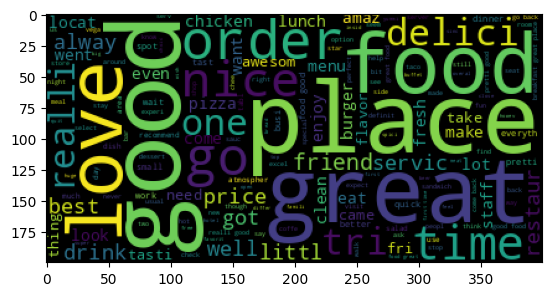

In [79]:
wordCloud(data_4_star)

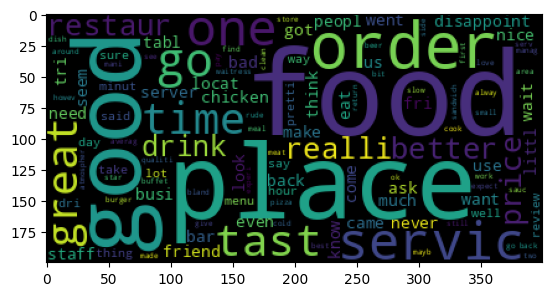

In [80]:
data_2_star = train_data[train_data['stars']==2.0]
data_2_star = data_2_star['clean_text']
wordCloud(data_2_star)

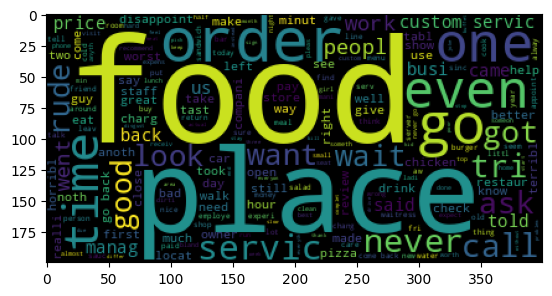

In [81]:
data_1_star = train_data[train_data['stars']==1.0]
data_1_star = data_1_star['clean_text']
wordCloud(data_1_star)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv = CountVectorizer(max_features=500)

In [84]:
X_train = cv.fit_transform(train_data['clean_text'])
X_test = cv.fit_transform(test_data['clean_text'])

In [85]:
X_train.shape

(17862, 500)

In [86]:
X_test.shape

(8799, 500)

In [87]:
train_data['sentiment']

6914     1
8332     1
2791     1
25106    1
11135    1
        ..
22447    0
26207    1
8429     0
20411    1
15380    0
Name: sentiment, Length: 17862, dtype: int64

In [88]:
y_train = train_data['sentiment'].values
y_test = test_data['sentiment'].values


In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
model = MultinomialNB()

In [91]:
model.fit(X_train,y_train)

MultinomialNB()

In [92]:
y_pred = model.predict(X_test)

In [93]:
y_test,y_pred

(array([1, 0, 1, ..., 1, 1, 0]), array([1, 1, 1, ..., 1, 1, 1]))

In [94]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
8794,1,1
8795,1,1
8796,1,1
8797,1,1


In [95]:
print("Accuracy on Training Data : ")
print(model.score(X_train,y_train))

Accuracy on Training Data : 
0.9088567909528609


In [96]:
print("Accuracy on Test Data : ")
print(model.score(X_test,y_test))

Accuracy on Test Data : 
0.738720309126037


In [97]:
unique_values = np.unique(y_pred)

# Display the unique values
print("Unique values in y_pred:", unique_values)

Unique values in y_pred: [0 1]


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle
nltk.download('stopwords')
nltk.download('punkt')


# Load the dataset
data = pd.read_csv("product_reviews.csv")  # Replace with your actual dataset path

# Load train-test split indices
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

# Separate the data into training and testing sets
train_data = data.iloc[train_test_index_dict['train_index']]
test_data = data.iloc[train_test_index_dict['test_index']]

# Define a function for text cleaning and preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the processed words back into a string
    processed_text = " ".join(words)

    return processed_text

# Apply text preprocessing to the training and testing data
train_data["processed_text"] = train_data["text"].apply(preprocess_text)
test_data["processed_text"] = test_data["text"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-98-ec22e8d8a970>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["processed_text"] = train_data["text"].apply(preprocess_text)
<ipython-input-98-ec22e8d8a970>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["processed_text"] = test_data["text

In [99]:
# Create BoW features using CountVectorizer
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(train_data["processed_text"])
X_test_bow = bow_vectorizer.transform(test_data["processed_text"])

# Train a classifier (example: Naive Bayes)
classifier_bow = MultinomialNB()
classifier_bow.fit(X_train_bow, train_data["stars"])

# Make predictions on the test set
predictions_bow = classifier_bow.predict(X_test_bow)

# Evaluate the model
print("Classification Report for BoW Features:")
print(classification_report(test_data["stars"], predictions_bow))


Classification Report for BoW Features:
              precision    recall  f1-score   support

         1.0       0.73      0.75      0.74      1149
         2.0       0.46      0.09      0.15       587
         4.0       0.48      0.49      0.49      1981
         5.0       0.79      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.55      0.55      8799
weighted avg       0.69      0.70      0.69      8799



#### Precision:

Class 1.0: Precision is 0.73, indicating that when the model predicts class 1.0, it is correct 73% of the time.

Class 2.0: Precision is 0.46, suggesting moderate success in predicting instances of class 2.0.

Class 4.0: Precision is 0.48, indicating that the model has moderate success in predicting instances of class 4.0.

Class 5.0: Precision is 0.79, suggesting that the model is good at predicting instances of class 5.0.

#### Recall:

Class 1.0: Recall is 0.75, indicating that the model identifies 75% of the actual instances of class 1.0.

Class 2.0: Recall is 0.09, suggesting that the model misses a significant portion of instances of class 2.0.

Class 4.0: Recall is 0.49, suggesting that the model is moderately effective in capturing instances of class 4.0.

Class 5.0: Recall is 0.84, showing that the model identifies 84% of the actual instances of class 5.0.

#### F1-Score:

Class 1.0: F1-score is 0.74, reflecting a good balance between precision and recall for class 1.0.

Class 2.0: F1-score is 0.15, indicating a lower overall performance and imbalance between precision and recall for class 2.0.

Class 4.0: F1-score is 0.49, suggesting a moderate overall performance in predicting class 4.0.

Class 5.0: F1-score is 0.81, indicating a good balance between precision and recall for class 5.0.

#### Accuracy:

Overall accuracy is 0.70, indicating that the model correctly predicts the class for 70% of the instances.

In [100]:
# Create TfIdf features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data["processed_text"])
X_test_tfidf = tfidf_vectorizer.transform(test_data["processed_text"])

# Train a classifier (example: Naive Bayes)
classifier_tfidf = MultinomialNB()
classifier_tfidf.fit(X_train_tfidf, train_data["stars"])

# Make predictions on the test set
predictions_tfidf = classifier_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("\nClassification Report for TfIdf Features:")
print(classification_report(test_data["stars"], predictions_tfidf))



Classification Report for TfIdf Features:
              precision    recall  f1-score   support

         1.0       0.92      0.11      0.20      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.53      0.01      0.02      1981
         5.0       0.59      1.00      0.74      5082

    accuracy                           0.59      8799
   macro avg       0.51      0.28      0.24      8799
weighted avg       0.58      0.59      0.46      8799



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Precision:

Class 1.0: Precision is 0.92, indicating that when the model predicts class 1.0, it is correct 92% of the time.

Class 2.0: Precision is 0.00, suggesting that the model struggles to correctly predict instances of class 2.0.

Class 4.0: Precision is 0.53, indicating that the model has moderate success in predicting instances of class 4.0.

Class 5.0: Precision is 0.59, suggesting that the model is decent at predicting instances of class 5.0.

#### Recall:

Class 1.0: Recall is 0.11, which means the model identifies only 11% of the actual instances of class 1.0.

Class 2.0: Recall is 0.00, indicating that the model misses all instances of class 2.0.

Class 4.0: Recall is 0.01, suggesting that the model is not effective in capturing instances of class 4.0.

Class 5.0: Recall is 1.00, showing that the model identifies all instances of class 5.0.


#### F1-Score:

Class 1.0: F1-score is 0.20, reflecting the balance between precision and recall for class 1.0.

Class 2.0: F1-score is 0.00, indicating a poor balance between precision and recall for class 2.0.

Class 4.0: F1-score is 0.02, suggesting a low overall performance in predicting class 4.0.

Class 5.0: F1-score is 0.74, indicating a good balance between precision and recall for class 5.0.


#### Accuracy:

Overall accuracy is 0.59, indicating that the model correctly predicts the class for 59% of the instances.






In [101]:
X_train_bow

<17862x20247 sparse matrix of type '<class 'numpy.int64'>'
	with 423105 stored elements in Compressed Sparse Row format>

### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [102]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from scipy.spatial.distance import cdist


f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


In [103]:
embeds

array([[ 0.50699836,  0.61128891, -0.2719104 , ...,  1.0390445 ,
        -0.80041009,  0.73497975],
       [-0.02217656, -0.1527285 , -0.55813098, ...,  0.18087101,
         0.16279726, -0.41220728],
       [ 0.52932245,  0.60723621, -0.25953016, ...,  1.0670861 ,
        -0.75681108,  0.69999683],
       ...,
       [-0.05420208, -0.14062414, -0.55579591, ...,  0.12184423,
         0.12340328, -0.31265116],
       [-0.02863726, -0.14980018, -0.55721784, ...,  0.17685497,
         0.16171496, -0.39407209],
       [-0.02447684, -0.15692814, -0.55817062, ...,  0.17620397,
         0.16273451, -0.39889568]])

(26661, 1024)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

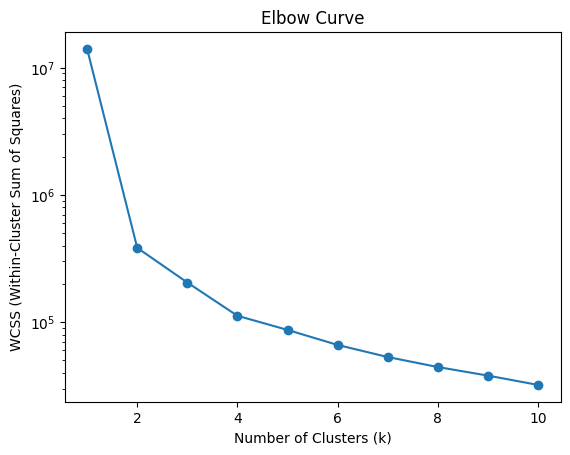

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Number of Clusters (k): 2
Initialization Method: k-means++
Purity: 0.6795
NMI: 0.5343
Rand Score: 0.4629


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Number of Clusters (k): 3
Initialization Method: k-means++
Purity: 0.5982
NMI: 0.5300
Rand Score: 0.4673


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Number of Clusters (k): 4
Initialization Method: k-means++
Purity: 0.5899
NMI: 0.5200
Rand Score: 0.4815


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Number of Clusters (k): 2
Initialization Method: random
Purity: 0.6795
NMI: 0.5343
Rand Score: 0.4629


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Number of Clusters (k): 3
Initialization Method: random
Purity: 0.6414
NMI: 0.5237
Rand Score: 0.4770


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Number of Clusters (k): 4
Initialization Method: random
Purity: 0.5899
NMI: 0.5200
Rand Score: 0.4815


In [108]:
print(embeds.shape)

# Function to plot the elbow curve
def plot_elbow_curve(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.yscale('log')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.show()

# Function to perform k-means clustering with various values of k and initialization methods
def perform_kmeans(data, k_values, init_methods=['k-means++', 'random']):
    for init_method in init_methods:
        for k in k_values:
            kmeans = KMeans(n_clusters=k, init=init_method, random_state=42)
            kmeans.fit(data)
            labels = kmeans.labels_

            # Evaluate clustering metrics
            purity = calculate_purity(labels, true_labels)
            nmi = normalized_mutual_info_score(true_labels, labels)
            rand_score = adjusted_rand_score(true_labels, labels)

            print(f"\nNumber of Clusters (k): {k}")
            print(f"Initialization Method: {init_method}")
            print(f"Purity: {purity:.4f}")
            print(f"NMI: {nmi:.4f}")
            print(f"Rand Score: {rand_score:.4f}")

# Function to calculate purity
def calculate_purity(cluster_labels, true_labels):
    # Find the most frequent true label in each cluster
    cluster_purities = []
    for cluster in range(max(cluster_labels) + 1):
        mask = (cluster_labels == cluster)
        most_frequent_true_label = np.argmax(np.bincount(true_labels[mask]))
        cluster_purities.append(np.sum(true_labels[mask] == most_frequent_true_label) / np.sum(mask))

    # Calculate overall purity
    purity = np.mean(cluster_purities)
    return purity

# Plot the elbow curve
plot_elbow_curve(embeds)

# Choose a suitable number of clusters based on the elbow curve and perform k-means clustering
optimal_k = 4  # Choose the optimal number of clusters based on the elbow curve
k_values = range(2, optimal_k + 1)

# Assuming true_labels is available (ground truth star ratings)
true_labels = data['stars']

# Perform k-means clustering with k values and different initialization methods, and evaluate metrics
perform_kmeans(embeds, k_values, init_methods=['k-means++', 'random'])
